In [3]:
import numpy as np
import librosa, librosa.display
import pandas as pd
import seaborn as sns


C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import matplotlib.pyplot as plt

In [3]:
file="blues.00000.wav"

In [12]:
signal

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

In [13]:
sr

22050

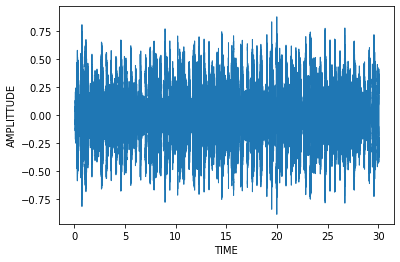

In [16]:
librosa.display.waveshow(signal,sr=sr)
plt.xlabel("TIME")
plt.ylabel("AMPLITTUDE")
plt.show()

In [17]:
#fft ->sepctrum
fft=np.fft.fft(signal)
magnitude= np.abs(fft) 

In [18]:
frequency=np.linspace(0,sr,len(magnitude))

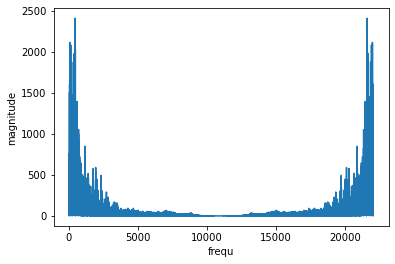

In [19]:
plt.plot(frequency,magnitude)
plt.xlabel("frequ")
plt.ylabel("magnitude")
plt.show()

In [20]:
#short time foureri transform to get spectrogram , gives info about amplitude and time
n_fft=2048
hop_length=512
stft=librosa.core.stft(signal,hop_length=hop_length,n_fft=n_fft)

In [21]:
spectrogram=np.abs(stft)

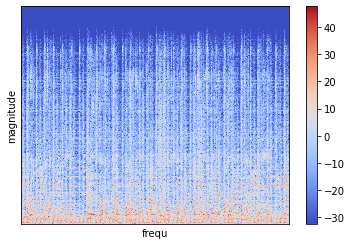

In [26]:
log_spectrogram=librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram,sr=sr,hop_length=hop_length)
plt.xlabel("time")
plt.ylabel("frequency")
plt.colorbar()
plt.show()

In [32]:
#MFCC
MFFCs=librosa.feature.mfcc(y=signal,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)

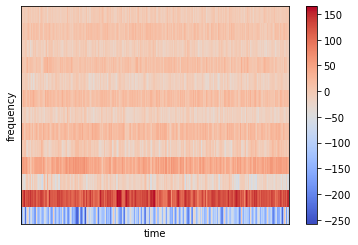

In [33]:
librosa.display.specshow(MFFCs,sr=sr,hop_length=hop_length)
plt.xlabel("time")
plt.ylabel("frequency")
plt.colorbar()
plt.show()

# MODEL

In [3]:
df=pd.read_csv("./data/features_3_sec.csv")

In [4]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [5]:
df.shape

(9990, 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'blues'),
  Text(1, 0, 'classical'),
  Text(2, 0, 'country'),
  Text(3, 0, 'disco'),
  Text(4, 0, 'hiphop'),
  Text(5, 0, 'jazz'),
  Text(6, 0, 'metal'),
  Text(7, 0, 'pop'),
  Text(8, 0, 'reggae'),
  Text(9, 0, 'rock')])

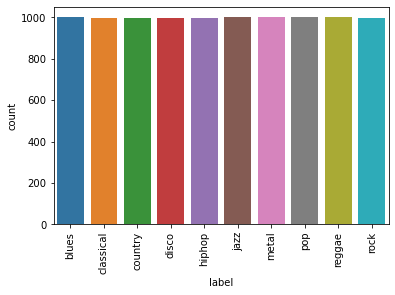

In [6]:
sns.countplot(x=df.label)
plt.xticks(rotation=90)

In [7]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [10]:
encoder=LabelEncoder()
standardize=StandardScaler()

In [11]:
x=df.iloc[:,1:-1]

In [12]:
x

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [13]:
y=df.iloc[:,-1:]

In [14]:
y

,label
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
9985,rock
9986,rock
9987,rock
9988,rock


In [15]:
X=np.array(x,dtype=float)

In [16]:
X=standardize.fit_transform(X)

In [17]:
Y=encoder.fit_transform(y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
X

array([[ 0.        , -0.48780784,  0.64052047, ..., -0.51356204,
         0.12841417, -0.29178072],
       [ 0.        , -0.40314187,  0.13183473, ...,  1.01138445,
         1.27578001,  0.05642464],
       [ 0.        , -0.36169428,  0.7644909 , ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [ 0.        , -0.35433044,  0.42997426, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.        ,  0.0883611 , -0.00630133, ..., -0.72456977,
         0.30333409, -0.95893743],
       [ 0.        , -0.11321002,  0.19536324, ..., -0.37245283,
        -0.47495901, -0.55112155]])

In [19]:
Y

array([0, 0, 0, ..., 9, 9, 9])

In [20]:
X.shape

(9990, 58)

In [21]:
Y.shape

(9990,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [24]:
x_train.shape

(6993, 58)

In [25]:
y_train.shape

(6993,)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
KN=KNeighborsClassifier()

In [28]:
KN.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
KN.predict(x_test)

array([9, 8, 1, ..., 5, 5, 5])

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_score(y_test,KN.predict(x_test))


0.8728728728728729

In [31]:
from xgboost import XGBClassifier

In [32]:
XGB=XGBClassifier()

In [33]:
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
XGB.predict(x_test)

array([9, 8, 1, ..., 5, 0, 5], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_score(y_test,XGB.predict(x_test))


0.8978978978978979

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
    
])

In [38]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [39]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128)

Epoch 1/100


55/55 [==============================] - 3s 22ms/step - loss: 1.6008 - accuracy: 0.4297 - val_loss: 1.0821 - val_accuracy: 0.6273
Epoch 2/100
55/55 [==============================] - 1s 15ms/step - loss: 1.1282 - accuracy: 0.6033 - val_loss: 0.8805 - val_accuracy: 0.7130
Epoch 3/100
55/55 [==============================] - 1s 17ms/step - loss: 0.9097 - accuracy: 0.6847 - val_loss: 0.7369 - val_accuracy: 0.7614
Epoch 4/100
55/55 [==============================] - 1s 20ms/step - loss: 0.8033 - accuracy: 0.7260 - val_loss: 0.6789 - val_accuracy: 0.7744
Epoch 5/100
55/55 [==============================] - 1s 16ms/step - loss: 0.6971 - accuracy: 0.7609 - val_loss: 0.6253 - val_accuracy: 0.7858
Epoch 6/100
55/55 [==============================] - 1s 16ms/step - loss: 0.6364 - accuracy: 0.7902 - val_loss: 0.5861 - val_accuracy: 0.8031
Epoch 7/100
55/55 [==============================] - 1s 17ms/step - loss: 0.5715 - accuracy: 0.8052 - val_loss: 0.5453 - val_accuracy: 0.8168
Epoc

In [40]:
_, accuracy = model.evaluate(x_test, y_test, batch_size=128)

24/24 [==============================] - 0s 7ms/step - loss: 0.3888 - accuracy: 0.9276


In [41]:
print("Accuracy:",accuracy) # print accuracy

Accuracy: 0.9275942444801331


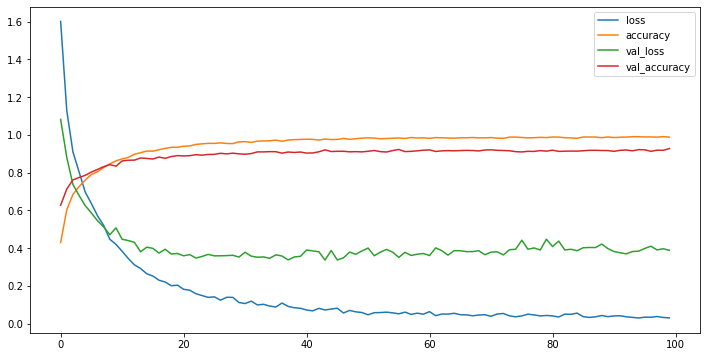

In [42]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

# Testing 30 sec data with model trained on 3 sec data

In [43]:
df=pd.read_csv("./data/features_30_sec.csv")

In [44]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [45]:
x1=df.iloc[:,1:-1]

In [46]:
y1=df.iloc[:,-1:]

In [47]:
X=np.array(x1,dtype=float)
X=standardize.fit_transform(X)
Y=encoder.fit_transform(y1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
XGB.predict(x_test)

array([1, 1, 8, 8, 4, 4, 9, 3, 0, 9, 0, 4, 1, 5, 5, 0, 7, 2, 0, 3, 9, 7,
       4, 3, 3, 2, 6, 9, 1, 3, 5, 3, 6, 4, 6, 2, 6, 6, 9, 2, 7, 4, 9, 9,
       4, 3, 0, 2, 0, 8, 2, 2, 9, 6, 8, 0, 1, 9, 1, 2, 0, 8, 1, 5, 5, 8,
       4, 1, 3, 5, 3, 1, 8, 9, 4, 6, 8, 6, 4, 4, 0, 7, 5, 5, 8, 3, 8, 9,
       7, 9, 6, 7, 6, 3, 9, 4, 7, 4, 7, 9, 4, 5, 2, 2, 9, 4, 0, 8, 4, 3,
       8, 1, 8, 0, 7, 8, 7, 3, 1, 1, 9, 7, 2, 9, 1, 8, 6, 9, 9, 1, 1, 6,
       1, 8, 3, 3, 8, 4, 3, 4, 7, 9, 1, 5, 8, 2, 1, 8, 7, 6, 4, 0, 0, 7,
       3, 6, 6, 6, 4, 5, 8, 5, 2, 8, 0, 5, 8, 2, 5, 6, 0, 9, 8, 3, 8, 9,
       9, 9, 2, 2, 0, 7, 2, 2, 3, 3, 2, 4, 3, 2, 7, 3, 0, 9, 2, 3, 2, 4,
       6, 5, 2, 5, 3, 0, 7, 5, 6, 0, 9, 5, 9, 3, 6, 5, 3, 1, 8, 3, 6, 5,
       1, 4, 3, 5, 8, 7, 8, 4, 6, 0, 4, 4, 3, 7, 9, 4, 2, 0, 0, 3, 3, 0,
       8, 7, 0, 6, 9, 9, 0, 4, 3, 2, 7, 6, 2, 4, 2, 2, 0, 4, 2, 4, 1, 8,
       4, 6, 0, 3, 1, 3, 6, 2, 7, 8, 8, 0, 8, 8, 8, 1, 7, 6, 5, 9, 7, 4,
       7, 1, 0, 8, 3, 5, 4, 6, 6, 5, 5, 1, 3, 6], d

In [49]:
accuracy_score(y_test,XGB.predict(x_test))

0.9766666666666667

In [50]:
KN.predict(x_test)

array([1, 1, 8, 4, 4, 4, 9, 3, 0, 6, 0, 2, 1, 1, 5, 0, 7, 2, 0, 3, 9, 7,
       4, 3, 3, 2, 6, 9, 1, 3, 5, 3, 6, 4, 6, 1, 6, 6, 9, 2, 8, 4, 9, 3,
       8, 3, 0, 2, 0, 8, 2, 7, 9, 6, 8, 0, 1, 9, 1, 2, 0, 8, 1, 5, 5, 8,
       4, 1, 3, 2, 3, 1, 8, 9, 4, 6, 8, 6, 4, 4, 2, 7, 5, 5, 8, 3, 8, 9,
       7, 9, 0, 7, 6, 3, 9, 4, 8, 4, 7, 9, 4, 5, 2, 2, 9, 4, 0, 8, 4, 3,
       8, 1, 8, 0, 7, 8, 7, 3, 1, 1, 9, 7, 2, 9, 1, 8, 6, 9, 9, 1, 1, 6,
       1, 8, 3, 3, 8, 4, 3, 4, 7, 9, 1, 5, 8, 2, 1, 8, 7, 6, 4, 0, 0, 7,
       3, 6, 6, 6, 4, 5, 8, 5, 2, 8, 0, 5, 8, 0, 5, 6, 0, 9, 8, 3, 8, 9,
       9, 9, 8, 2, 0, 7, 2, 2, 3, 3, 2, 4, 3, 2, 7, 3, 0, 9, 2, 3, 2, 4,
       6, 5, 2, 5, 3, 0, 7, 5, 6, 0, 9, 5, 9, 3, 6, 5, 3, 5, 8, 3, 6, 5,
       1, 4, 3, 5, 8, 7, 8, 4, 6, 0, 4, 4, 3, 7, 9, 4, 2, 0, 0, 3, 3, 0,
       8, 7, 0, 6, 9, 9, 0, 4, 3, 2, 7, 6, 2, 4, 2, 2, 0, 4, 2, 4, 1, 8,
       4, 6, 0, 3, 1, 3, 6, 2, 7, 8, 8, 0, 8, 8, 8, 1, 7, 6, 5, 9, 7, 4,
       7, 1, 0, 8, 3, 5, 4, 6, 6, 5, 5, 1, 3, 6])

In [51]:
accuracy_score(y_test,KN.predict(x_test))

0.9666666666666667

In [52]:
results = model.evaluate(x_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])


10/10 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.9933
Test loss: 0.010752236470580101
Test accuracy: 0.9933333396911621


# CNN

In [1]:
!pip install livelossplot

In [5]:
import random, os, glob # default python modules that let me randomise and manipulate files
import numpy as np # for data manipulation through arrays
import tensorflow as tf
from keras.models import Sequential # the model I will use
from keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten, Reshape, BatchNormalization, GlobalAveragePooling2D # layers I will incorporate
from keras.callbacks import EarlyStopping # for better training
from tensorflow.keras.applications import VGG19 # transfer learning model
from keras import backend
from livelossplot import PlotLossesKeras # to visualy display how my model improves as training progresses
import librosa # to demonstrate the creation of a mel spectsrogram
from librosa.display import specshow
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
def setRandom():
    seed = 0 # random seed value
    os.environ["PYTHONHASHSEED"] = str(seed) # if this is not set, a random value is used to seed the hashes of some objects
    random.seed(seed) # sets the base python and numpy random seeds
    np.random.seed(seed)
    tf.random.set_seed(seed) # sets the tensorflow random seed
    tf.compat.v1.set_random_seed(seed)

do map the audio to the neural network, we will be needing is a mel spectogram to represent the audio in diagram due to its ability to better represent human auditory perception.

In [7]:
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
source = r'C:\Users\Admin\Desktop\5th\Untitled Folder\Data\images_original'


In [8]:
setRandom()  # Assuming this is a function to set the random seed or perform some randomization.
split = [80, 9, 10] 
train, val, test = {}, {}, {} 
trainLen, valLen, testLen = {}, {}, {}  
dictionaries = [train, val, test]  
for d in dictionaries:
    if d == train:
        num = slice(0, split[0])
    elif d == val:
        num = slice(split[0], split[0] + split[1])  
    else:
        num = slice(split[0] + split[1], split[0] + split[1] + split[2])  

    for genre in genres:  
        path = os.path.join(source, genre)
        pngs = glob.glob(os.path.join(path, "*.png"))  
        selected = pngs[num] 
        d[genre] = selected  

lenDictionaries = [{genre: len(d[genre]) for genre in genres} for d in dictionaries] 

# Print the lengths of each dataset for each genre.
print(f"\033[1mTraining:\033[0m {lenDictionaries[0]}")
print(f"\033[1mValidation:\033[0m {lenDictionaries[1]}")
print(f"\033[1mTest:\033[0m {lenDictionaries[2]}")



Training: {'blues': 80, 'classical': 80, 'country': 80, 'disco': 80, 'hiphop': 80, 'jazz': 80, 'metal': 80, 'pop': 80, 'reggae': 80, 'rock': 80}
Validation: {'blues': 9, 'classical': 9, 'country': 9, 'disco': 9, 'hiphop': 9, 'jazz': 9, 'metal': 9, 'pop': 9, 'reggae': 9, 'rock': 9}
Test: {'blues': 10, 'classical': 10, 'country': 10, 'disco': 10, 'hiphop': 10, 'jazz': 10, 'metal': 10, 'pop': 10, 'reggae': 10, 'rock': 10}


In [9]:
batchsize=32
genremap={
    "blues": 0,
    "classical":1,
    "country": 2,
    "disco":3,
    "hiphop":4,
    "jazz":5,
    "metal":6,
    "pop":7,
    "reggae":8,
    "rock":9
}

In [10]:
inverseGenreMap = {value: key for key, value in genremap.items()}

In [11]:
inverseGenreMap

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [12]:
def createDataset(d):
    imgsize=(288,432)
    imagelist,labelist=[],[]
    for genre ,paths in d.items():
        for path in paths:
            image=tf.cast(tf.image.resize(tf.image.decode_png(tf.io.read_file(path),channels=3),imgsize),tf.float32)/255.0
            imagelist.append(image)
            labelist.append(genremap[genre])
    dataset=tf.data.Dataset.from_tensor_slices((imagelist,labelist)).shuffle(buffer_size=len(imagelist)).batch(batchsize)
    return(dataset)

In [13]:
def prep(ds):
    out = (
        ds.map(lambda image, label: (tf.image.convert_image_dtype(image, tf.float32), label))
        .cache()
        .prefetch(buffer_size = tf.data.experimental.AUTOTUNE) 
    )
    return out 

In [14]:
training, validation, testing = prep(createDataset(train)), prep(createDataset(val)), prep(createDataset(test))
print("Datasets created.")

Datasets created.


Training Examples:


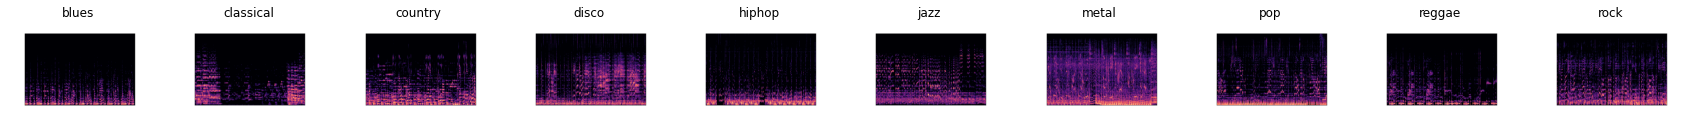

Validation Examples:


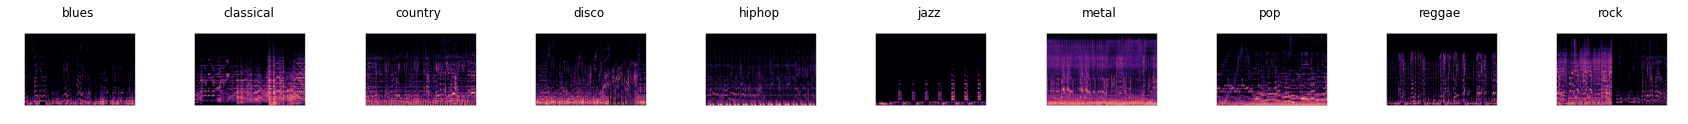

Testing Examples:


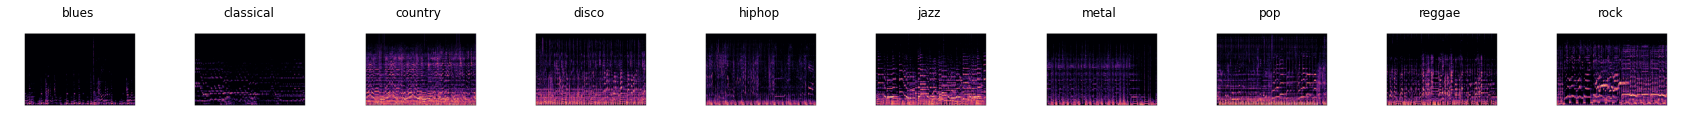

In [15]:
def view_dataset(dataset):
    genreExamples = {}  
    
    for images, labels in dataset:
        for image, label in zip(images, labels):
            label = int(label.numpy()) 
            if label not in genreExamples:
                genreExamples[label] = image
                
        if len(genreExamples) == len(genres):
            break
    
    
    plt.figure(figsize = (30, 20))
    for label, image in genreExamples.items():
        ax = plt.subplot(1, len(genres), label + 1)
        plt.imshow(image)
        plt.title(inverseGenreMap[label])
        plt.axis("off")
    plt.show()

print("\033[1mTraining Examples:\033[0m"); view_dataset(training)  
print("\033[1mValidation Examples:\033[0m"); view_dataset(validation)
print("\033[1mTesting Examples:\033[0m"); view_dataset(testing)

In [17]:
from tensorflow.keras.applications import InceptionV3 # transfer learning model
baseModel = InceptionV3(input_shape = inputShape, weights = "imagenet", include_top = False, pooling = "avg")

for layer in baseModel.layers:
    layer.trainable = False # freeze the pre-trained layers

transfer = Sequential([
    baseModel,
    
    Flatten(),
    BatchNormalization(),
    Dense(512, activation = "relu"),
    Dropout(0.3),
    Dense(256, activation = "relu"),
    Dropout(0.3), # dropout layer to prevent overfitting
    Dense(128, activation = "relu"),
    Dropout(0.3),
    Dense(len(genres), activation = "softmax")
])

transfer.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.0001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
transfer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

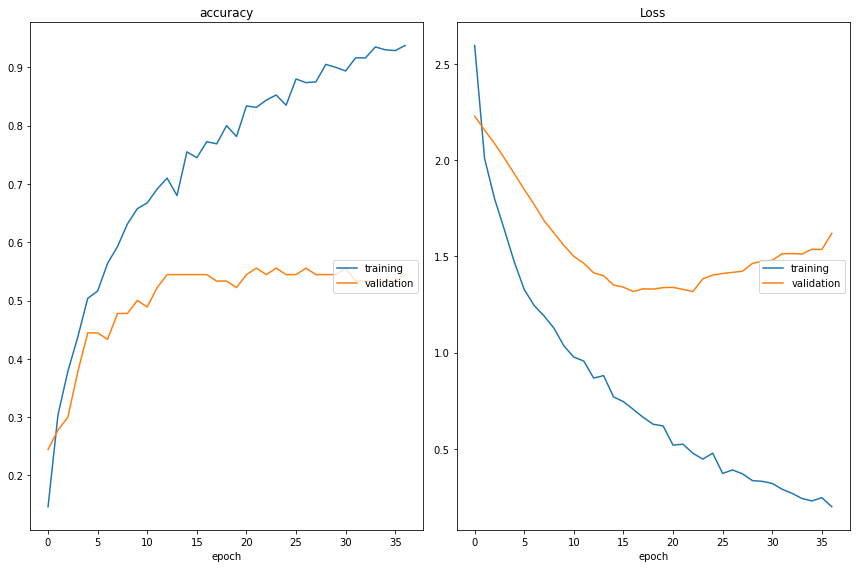

accuracy
	training         	 (min:    0.146, max:    0.938, cur:    0.938)
	validation       	 (min:    0.244, max:    0.556, cur:    0.544)
Loss
	training         	 (min:    0.200, max:    2.595, cur:    0.200)
	validation       	 (min:    1.317, max:    2.228, cur:    1.619)
25/25 [==============================] - 77s 3s/step - loss: 0.2000 - accuracy: 0.9375 - val_loss: 1.6192 - val_accuracy: 0.5444


In [72]:
setRandom()
transferHistory = transfer.fit(training, validation_data = validation, batch_size = batchsize, epochs = 500, verbose = 1, callbacks = [earlyStopping, PlotLossesKeras()])

In [18]:
cnn = Sequential([
    BatchNormalization(input_shape = inputShape),
    
    Conv2D(32, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Conv2D(512, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Flatten(),
    Dense(1024, activation = "relu"),
    Dropout(0.5),
    Dense(512, activation = "relu"),
    Dropout(0.5),
    BatchNormalization(),
    Dense(len(genres), activation = "softmax")
])

history=cnn.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) # "sparse_categorical_crossentropy" because labels are integers
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_95 (Ba  (None, 288, 432, 3)       12        
 tchNormalization)                                               
                                                                 
 conv2d_94 (Conv2D)          (None, 286, 430, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 143, 215, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 141, 213, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 70, 106, 64)       0         
 g2D)                                                            
                                                      

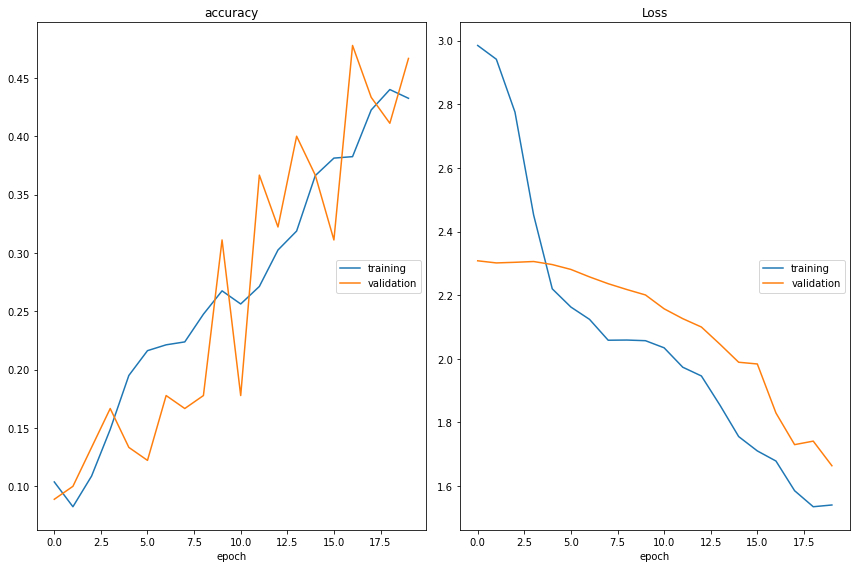

accuracy
	training         	 (min:    0.083, max:    0.440, cur:    0.433)
	validation       	 (min:    0.089, max:    0.478, cur:    0.467)
Loss
	training         	 (min:    1.535, max:    2.985, cur:    1.541)
	validation       	 (min:    1.664, max:    2.308, cur:    1.664)
25/25 [==============================] - 100s 4s/step - loss: 1.5406 - accuracy: 0.4325 - val_loss: 1.6640 - val_accuracy: 0.4667


In [19]:
setRandom()
cnn.fit(training, validation_data = validation, batch_size = batchsize, epochs = 20, verbose = 1, callbacks = [earlyStopping, PlotLossesKeras()])

In [ ]:
setRandom()
history=cnn.fit(training, validation_data = validation, batch_size = batchsize, epochs = 20, verbose = 1, callbacks = [earlyStopping, PlotLossesKeras()])

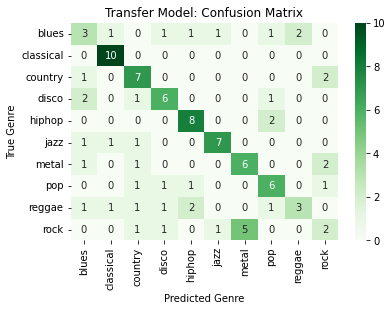

Transfer Model
Training Accuracy: 90.25% 
Train Loss: 0.489

Validation Accuracy: 54.4444% 
Test Loss: 1.3174

Testing Accuracy: 58.0% 
Test Loss: 1.1616


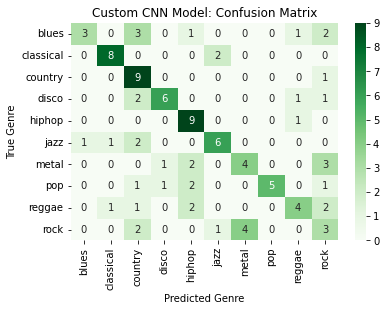

Custom CNN Model
Training Accuracy: 99.625% 
Train Loss: 0.0409

Validation Accuracy: 63.3333% 
Test Loss: 1.4294

Testing Accuracy: 57.0% 
Test Loss: 1.4411


In [76]:
def confusionMatrix(model, name):
    trueLabels = np.concatenate([y for x, y in testing], axis = 0) # get the true labels from the testing dataset

    predictedLabels = np.argmax(model.predict(testing, verbose = 0), axis = 1) # get the predicted labels from the model

    matrix = confusion_matrix(trueLabels, predictedLabels) # create the confusion matrix

    plt.figure() # plot the confusion matrix using seaborn for the heatmap
    sns.heatmap(matrix, annot = True, cmap = "Greens", xticklabels = genres, yticklabels = genres)
    plt.xlabel("Predicted Genre")
    plt.ylabel("True Genre")
    plt.title(f"{name} Model: Confusion Matrix")
    plt.show()
    
    trainStats, valStats, testStats = model.evaluate(training, verbose = 0), model.evaluate(validation, verbose = 0), model.evaluate(testing, verbose = 0)
    print(f"\033[1m{name} Model\033[0m")
    print(f"Training Accuracy: {round(trainStats[1] * 100, 4)}% \nTrain Loss: {round(trainStats[0], 4)}\n")
    print(f"Validation Accuracy: {round(valStats[1] * 100, 4)}% \nTest Loss: {round(valStats[0], 4)}\n")
    print(f"Testing Accuracy: {round(testStats[1] * 100, 4)}% \nTest Loss: {round(testStats[0], 4)}")

confusionMatrix(transfer, "Transfer")
confusionMatrix(cnn, "Custom CNN")

In [77]:
setRandom()
genre, paths = random.choice(list(test.items())) # chooses a random genre and corresponding list of paths
path = paths[random.randint(0, len(paths) - 1)] # chooses a random path within that list
soundPath = f"{path[:-4]}.wav".replace("images_original", "genres_original") # creates a new variable for the image path's respective audio file path
soundPath = soundPath[:-9] + "." + soundPath[-9:]

image = tf.image.decode_png(tf.io.read_file(path), channels = 3)
image = tf.image.resize(image, inputShape[:2])  # resize the image to the input shape of the model
image = tf.cast(image, tf.float32) / 255.0 # normalise pixel values
image = np.expand_dims(image, axis = 0) # expand dimensions to match the batch size (even though it's just one image)

predictions = cnn.predict(image) # make a prediction using the custom cnn model
predictedGenre = inverseGenreMap[np.argmax(predictions)] # get the predicted class label

print(f"\033[1mPredicted genre:\033[0m {predictedGenre}")
print(f"\033[1mActual genre:\033[0m {genre}")
print(f"\033[1mFilepath:\033[0m {soundPath[71:]}")
ipd.Audio(soundPath)

1/1 [==============================] - 0s 257ms/step
Predicted genre: disco
Actual genre: metal
Filepath: etal.00095.wav
